# Example 3: Global sensitivity analysis using multi-task simulations

This notebook demonstrates how to perform global sensitivity analysis using Sobol indices on the [virus-macrophage](https://github.com/MathCancer/PhysiCell/tree/master/sample_projects/virus_macrophage) PhysiCell model. The analysis employs multi-task parallel simulation execution to efficiently explore parameter sensitivity across the entire parameter space. The Sobol method quantifies both first-order and total-order sensitivity indices, providing insights into individual parameter importance and parameter interactions.

The workflow includes:
1. **Sample generation**: Using Sobol sequences to create quasi-random parameter samples that ensure uniform coverage of the parameter space
2. **Multi-task simulation**: Parallel execution of PhysiCell simulations across multiple worker processes to maximize computational efficiency
3. **QoI extraction**: Computing quantities of interest from simulation outputs using custom functions
4. **Statistical analysis**: Calculating summary statistics across multiple replicates to account for stochastic variability
5. **Sensitivity computation**: Computing first-order (S1) and total-order (ST) Sobol sensitivity indices

The analysis focuses on the following parameters:
- **viral_replication_rate**: The rate of virus replication inside epithelial cells
- **min_virion_count**: The minimum number of virions required for a macrophage to recognize them as non-self

The quantities of interest examined include cell population dynamics and molecular concentrations over time.

In [ ]:
from uq_physicell.model_analysis import ModelAnalysisContext, run_simulations, run_global_sa
from uq_physicell.model_analysis.utils import calculate_qoi_statistics
from uq_physicell.database.ma_db import load_structure

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Database name to save all simulations
db_path = "ex3_PhysiCell_SA_MultiTask.db"
model_config  = {"ini_path": "Model_Struct.ini", "struc_name": 'physicell_model_2'}
# Define parameter space
params_info = {
    "viral_replication_rate": {"lower_bound": 0.05, "upper_bound": 0.20, "ref_value": 0.15},
    "min_virion_count": {"lower_bound": 0.5, "upper_bound": 1.5, "ref_value": 1.0}
}
# Define the name of sampler, the sampler needs to be compatible with SA method selected
sampler = "Sobol"
# If you want a particular qoi function you can create your own summary function and assing to ModelAnalysisContext (qoi_funcs={} and context.summary_function)
qoi_funcs = {
    "epithelial_live": "lambda df: len( df[ (df['dead'] == False) & (df['cell_type'] == 'epithelial cell') ] )",
    "interferon_mean": "lambda df_subs: df_subs['interferon'].mean()"
}

## Create the Model Analysis Context, Generate Samples, and Run Simulations

In [2]:
# Setup the context and number of workers to run simulations
context = ModelAnalysisContext(db_path, model_config, sampler, params_info, qoi_funcs, num_workers=8)
# Generate the samples using the specified sampler
# Sobol' sequence is a quasi-random low-discrepancy sequence used to generate uniform smaples of parameter space. 
# The UQ_physicell default is calculate second order of sensitivity, then generate a total of N*(2D+2) samples, where D is number of parameters.
context.generate_samples(N=8)
print(f"Generated {len(context.dic_samples)} samples using {sampler}")
run_simulations(context)
print(f"Simulations completed and results stored in the database: {db_path}.")

Generated 48 samples using Sobol
Inserting parameter: viral_replication_rate with properties: {'lower_bound': 0.05, 'upper_bound': 0.2, 'ref_value': 0.15, 'perturbation': None}
Inserting parameter: min_virion_count with properties: {'lower_bound': 0.5, 'upper_bound': 1.5, 'ref_value': 1.0, 'perturbation': None}
Inserting {'epithelial_live': "lambda df: len( df[ (df['dead'] == False) & (df['cell_type'] == 'epithelial cell') ] )", 'interferon_mean': "lambda df_subs: df_subs['interferon'].mean()"} QoIs into the database
Simulations completed and results stored in the database: ex4_PhysiCell_SA_MultiTask.db.


## Load the database and Calculate the summary statistics

In [3]:
df_metadata, df_parameter_space, df_qois, dic_input, df_output = load_structure(db_path)
print("Calculate summary stats accros replicates...")
df_summary_qois, df_relative_mcse = calculate_qoi_statistics(df_output, qoi_funcs, db_path)
display(df_summary_qois)

Calculate summary stats accros replicates...
Calculating QoIs from existing DataFrame...
Number of replicates: 5


,epithelial_live_0,time_0,epithelial_live_1,time_1,epithelial_live_2,time_2,epithelial_live_3,time_3,epithelial_live_4,time_4,...,time_8,interferon_mean_0,interferon_mean_1,interferon_mean_2,interferon_mean_3,interferon_mean_4,interferon_mean_5,interferon_mean_6,interferon_mean_7,interferon_mean_8
SampleID,,,,,,,,,,,,,,,,,,,,,
0,1010.0,0.0,1010.0,360.0,1010.0,720.0,1010.0,1080.0,1010.0,1440.0,...,2880.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
1,1010.0,0.0,1010.0,360.0,1010.0,720.0,1010.0,1080.0,1010.0,1440.0,...,2880.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
2,1010.0,0.0,1006.0,360.0,1002.0,720.0,991.8,1080.0,980.6,1440.0,...,2880.0,0.0,0.000746,0.000249,0.003443,0.002127,7.058404e-03,7.712273e-03,3.702837e-03,1.747772e-03
3,1010.0,0.0,1006.2,360.0,1003.6,720.0,961.2,1080.0,934.0,1440.0,...,2880.0,0.0,0.000771,0.000448,0.005632,0.002384,6.481311e-03,7.440490e-03,7.939029e-03,6.703746e-03
4,1010.0,0.0,1010.0,360.0,1010.0,720.0,1010.0,1080.0,1010.0,1440.0,...,2880.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
5,1010.0,0.0,1006.8,360.0,968.4,720.0,914.6,1080.0,618.6,1440.0,...,2880.0,0.0,0.000845,0.008913,0.004230,0.013991,7.709473e-03,4.808492e-36,5.315725e-192,7.163952e-322
6,1010.0,0.0,1005.6,360.0,1002.2,720.0,973.4,1080.0,938.0,1440.0,...,2880.0,0.0,0.000696,0.000274,0.003010,0.003933,7.062020e-03,7.503569e-03,6.048845e-03,5.164574e-03
7,1010.0,0.0,1007.6,360.0,1004.2,720.0,1002.0,1080.0,985.0,1440.0,...,2880.0,0.0,0.000944,0.000522,0.000248,0.002395,8.753841e-04,2.682739e-04,6.028258e-04,5.609218e-04
8,1010.0,0.0,1010.0,360.0,1010.0,720.0,1010.0,1080.0,1010.0,1440.0,...,2880.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


### Plot the summary stats and Monte Carlo Standart Error (MCSE)

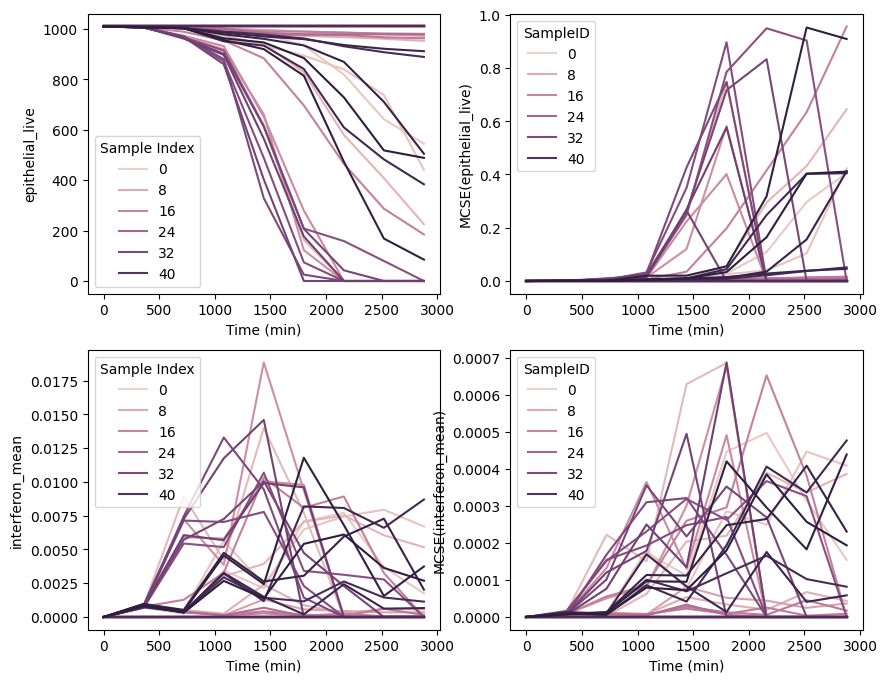

In [4]:
fig, axes = plt.subplots(len(qoi_funcs.keys()), 2, figsize=(10, 4*len(qoi_funcs.keys())))
time_columns = sorted([col for col in df_summary_qois.columns if col.startswith("time_")])
for ax_id, qoi_name in enumerate(qoi_funcs.keys()):
    qoi_columns = sorted([col for col in df_summary_qois.columns if col.startswith(qoi_name)])
    # Prepare the data for seaborn
    plot_data_summary = pd.DataFrame({"Time": df_summary_qois[time_columns].values.flatten(), qoi_name: df_summary_qois[qoi_columns].values.flatten(), "SampleID": df_summary_qois.index.repeat(len(qoi_columns))})
    plot_data_mcse = pd.DataFrame({"Time": df_relative_mcse[time_columns].values.flatten(), qoi_name: df_relative_mcse[qoi_columns].values.flatten(), "SampleID": df_relative_mcse.index.repeat(len(qoi_columns))})
    # Plot summary stats
    sns.lineplot(data=plot_data_summary, x="Time", y=qoi_name, hue="SampleID", ax=axes[ax_id,0])
    axes[ax_id,0].set_xlabel("Time (min)")
    axes[ax_id,0].set_ylabel(qoi_name)
    # Only add legend if there are labeled artists
    handles, labels = axes[ax_id,0].get_legend_handles_labels()
    if handles and labels:
        axes[ax_id,0].legend(title="Sample Index")

    # Plot mcse
    sns.lineplot(data=plot_data_mcse, x="Time", y=qoi_name, hue="SampleID", ax=axes[ax_id,1])
    axes[ax_id,1].set_xlabel("Time (min)")
    axes[ax_id,1].set_ylabel(f"MCSE({qoi_name})")

## Run the Sobol Sensitivity Analysis

In [5]:
sa_method = "Sobol Sensitivity Analysis"
all_qois_names = list(qoi_funcs.keys())
all_times_label = [col for col in df_summary_qois.columns if col.startswith("time")]
params_info["samples"] = dic_input
sa_results, qoi_time_values = run_global_sa(params_info, sa_method, all_times_label, all_qois_names, df_summary_qois)

Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 0.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 360.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 720.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 1080.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 1440.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 1800.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 2160.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 2520.0
Running Sobol Sensitivity Analysis for QoI: epithelial_live and time: 2880.0
Running Sobol Sensitivity Analysis for QoI: interferon_mean and time: 0.0
Running Sobol Sensitivity Analysis for QoI: interferon_mean and time: 360.0
Running Sobol Sensitivity Analysis for QoI: interferon_mean and time: 720.0
Running Sobol Sensitivity Analysis for QoI: interferon_mean and time: 1080.0
Running S

/Users/heberlr/.pyenv/versions/pcvenv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))
/Users/heberlr/.pyenv/versions/pcvenv/lib/python3.12/site-packages/SALib/analyze/sobol.py:141: RuntimeWarning: invalid value encountered in divide
  Y = (Y - Y.mean()) / Y.std()


### Plot SA results

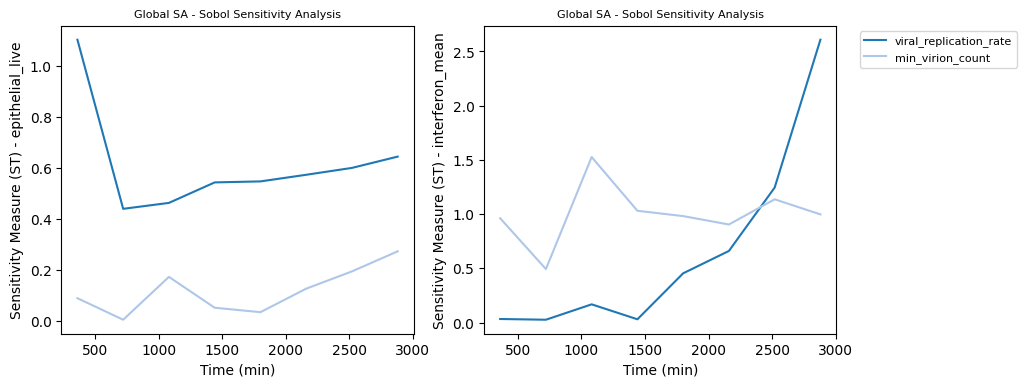

In [6]:
fig, axes = plt.subplots(1, len(qoi_funcs.keys()), figsize=(5*len(qoi_funcs.keys()), 4))
param_names = [key for key in params_info if key != "samples"]
SI = "ST"
for ax_id, qoi_name in enumerate(qoi_funcs.keys()):
    # This is necessary because Sobol method does not return the names of the parameters
    plot_data = pd.DataFrame([{ "Time": qoi_time_values[time_label], "Sensitivity Index": sa_results[qoi_name][time_label][SI][param_id],
            "Parameter": param}
        for time_label in sa_results[qoi_name].keys()
        for param_id, param in enumerate(param_names)
    ])
    # Sort Parameters by the maximum Sensitivity Index in descending order
    parameter_order = (
        plot_data.groupby("Parameter")["Sensitivity Index"]
        .max()
        .sort_values(ascending=False)
        .index
    )
    custom_palette = sns.color_palette("tab20", len(plot_data["Parameter"].unique()))
    sns.lineplot(data=plot_data, x="Time", y="Sensitivity Index", hue="Parameter", ax=axes[ax_id], palette=custom_palette, hue_order=parameter_order)                
    axes[ax_id].set_xlabel("Time (min)")
    axes[ax_id].set_ylabel(f"Sensitivity Measure ({SI}) - {qoi_name}")
    axes[ax_id].set_title(f"Global SA - {sa_method}", fontsize=8)
    # Only add legend if it is the last qoi
    if qoi_name == list(qoi_funcs.keys())[-1]:
        handles, labels = axes[ax_id].get_legend_handles_labels()
        if handles and labels:
            axes[ax_id].legend(bbox_to_anchor=(1.05, 1), loc="upper left", title_fontsize=8, fontsize=8)
    else:
        axes[ax_id].get_legend().remove()